# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Judul : Titanic
   
   link kaggle : https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download
   
   Deskripsi : Dataset ini berisi informasi penumpang Titanic seperti umur, jenis kelamin, kelas penumpang, harga tiket, dll, dan target `Survived` untuk memprediksi apakah penumpang selamat atau tidak.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Download dataset Titanic dari Kaggle
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Path to dataset files:", path)

# Cek isi folder dataset
files = os.listdir(path)
print("Files in dataset directory:", files)

# Ambil file CSV
csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

# Load dataset
df = pd.read_csv(csv_path)

# Preview dataset
df.head()


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset
Files in dataset directory: ['Titanic-Dataset.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


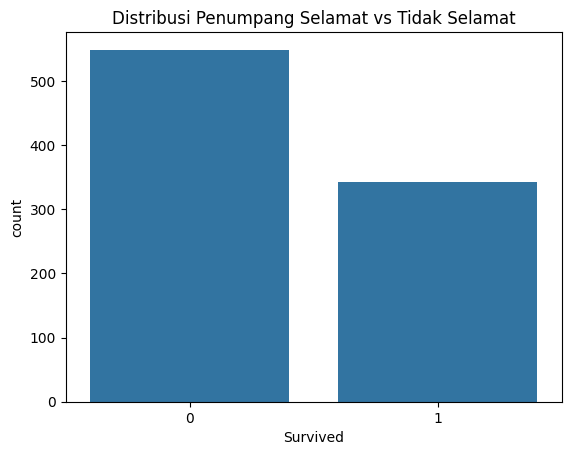

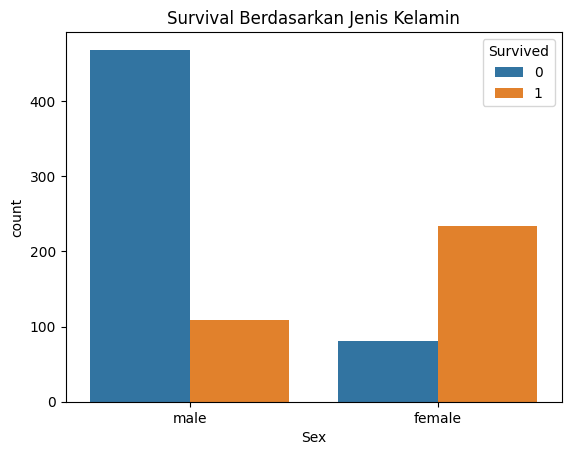

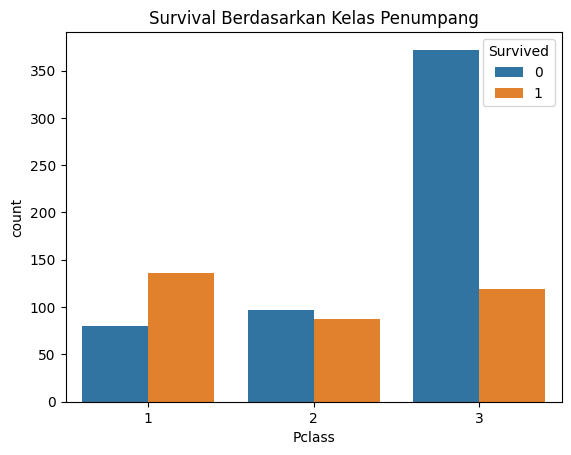

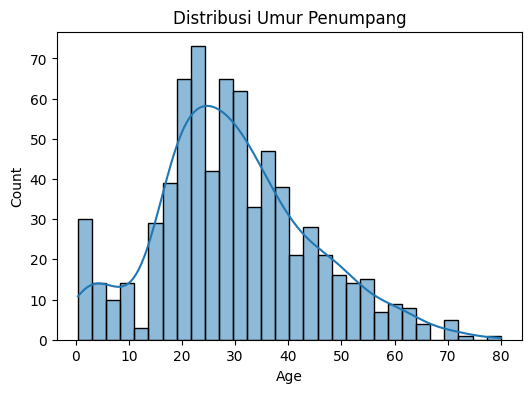

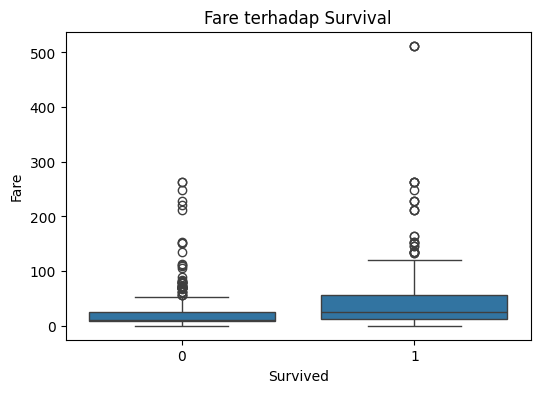

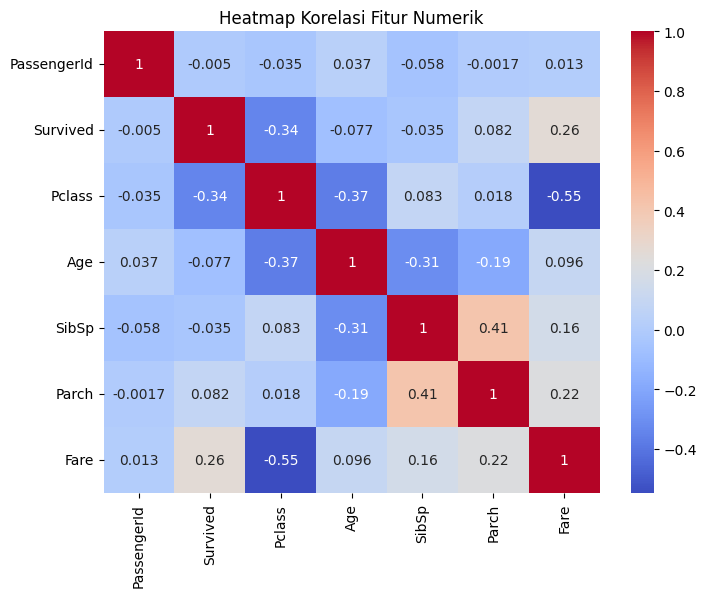

In [3]:
# Informasi dataset
df.info()

# Statistik deskriptif
df.describe()

# Distribusi target
sns.countplot(x='Survived', data=df)
plt.title('Distribusi Penumpang Selamat vs Tidak Selamat')
plt.show()

# Survival berdasarkan jenis kelamin
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Berdasarkan Jenis Kelamin')
plt.show()

# Survival berdasarkan kelas penumpang
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Berdasarkan Kelas Penumpang')
plt.show()

# Distribusi umur
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Umur Penumpang')
plt.show()

# Fare vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare terhadap Survival')
plt.show()

# Korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Reload the dataset to ensure a fresh start for preprocessing
df = pd.read_csv(csv_path)

df.isnull().sum()

# Drop kolom Cabin karena terlalu banyak missing value
# Menggunakan errors='ignore' agar tidak error jika kolom 'Cabin' sudah tidak ada
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Isi missing Age dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Isi missing Embarked dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Hapus data duplikat
df.drop_duplicates(inplace=True)

# Encoding kolom Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.drop(columns=['Name', 'Ticket'], inplace=True)

# Simpan dataset hasil preprocessing
os.makedirs("titanic_preprocessing", exist_ok=True)

output_path = "titanic_preprocessing/titanic_clean.csv"
df.to_csv(output_path, index=False)

print("Dataset hasil preprocessing disimpan di:", output_path)


Dataset hasil preprocessing disimpan di: titanic_preprocessing/titanic_clean.csv
